In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


# Carga de datos

In [21]:
price = np.genfromtxt("idealista_madrid.csv", usecols=(0), delimiter=",", skip_header=1, dtype=np.float32, encoding="utf-8")
baths = np.genfromtxt("idealista_madrid.csv", usecols=(1), delimiter=",", skip_header=1, dtype=np.int32, encoding="utf-8")
rooms = np.genfromtxt("idealista_madrid.csv", usecols=(2), delimiter=",", skip_header=1, dtype=np.int32, encoding="utf-8")
sqft = np.genfromtxt("idealista_madrid.csv", usecols=(3), delimiter=",", skip_header=1, dtype=np.int32, encoding="utf-8")
address = np.genfromtxt("idealista_madrid.csv", usecols=(4), delimiter=",", skip_header=1, dtype=str, encoding="utf-8")



# 1. Media, mediana, máximo, mínimo


In [22]:
print("Media:")
print(f"price: {np.mean(price)}, baths: {np.mean(baths)}, rooms: {np.mean(rooms)}, sqft: {np.mean(sqft)}")

print("\nMediana:")
print(f"price: {np.median(price)}, baths: {np.median(baths)}, rooms: {np.median(rooms)}, sqft: {np.median(sqft)}")

print("\nMáximo y mínimo:")
print(f"price: {np.max(price)}, {np.min(price)}, baths: {np.max(baths)}, {np.min(baths)}, rooms: {np.max(rooms)}, {np.min(rooms)}, sqft: {np.max(sqft)}, {np.min(sqft)}")

Media:
price: 1290575.125, baths: 2.900546448087432, rooms: 3.4743169398907106, sqft: 217.2382513661202

Mediana:
price: 990000.0, baths: 3.0, rooms: 3.0, sqft: 158.0

Máximo y mínimo:
price: 8900000.0, 122000.0, baths: 12, 1, rooms: 12, 0, sqft: 1768, 14



# Visualizaciones iniciales


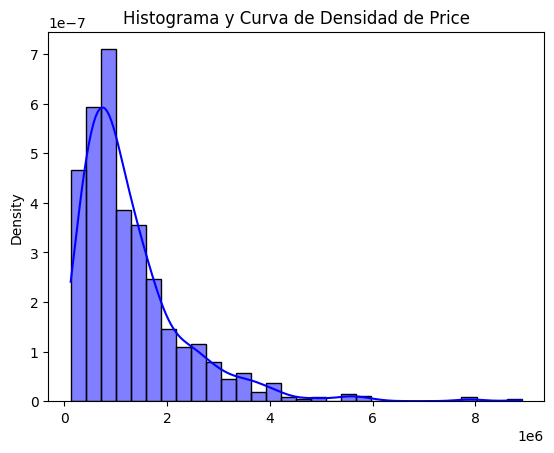

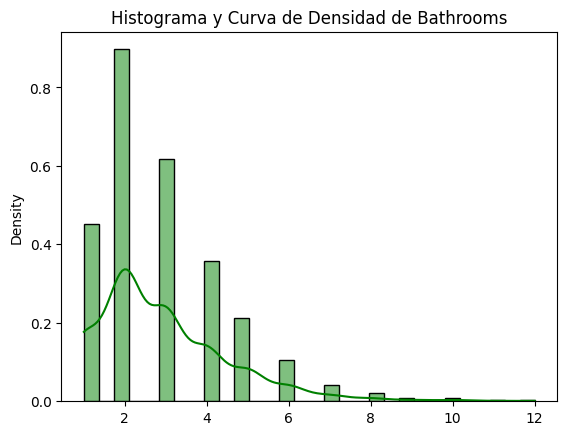

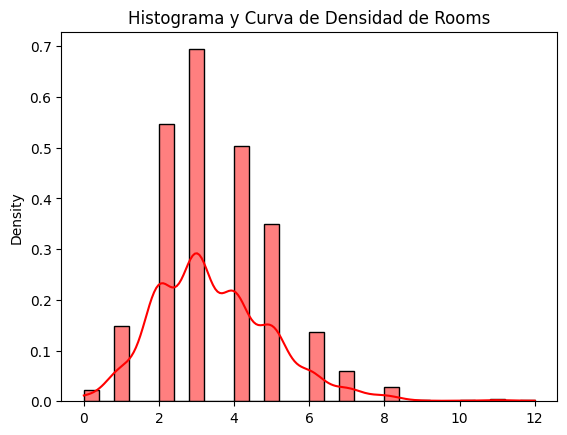

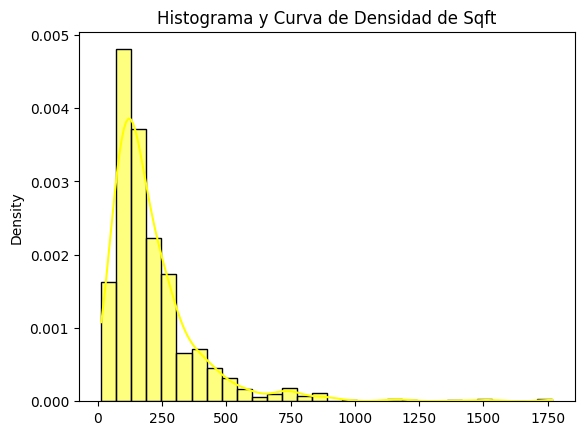

In [23]:

sns.histplot(price, kde=True, color='blue', stat='density', bins=30)
plt.title("Histograma y Curva de Densidad de Price")
plt.show()

sns.histplot(baths, kde=True, color='green', stat='density', bins=30)
plt.title("Histograma y Curva de Densidad de Bathrooms")
plt.show()

sns.histplot(rooms, kde=True, color='red', stat='density', bins=30)
plt.title("Histograma y Curva de Densidad de Rooms")
plt.show()

plt.figure()
sns.histplot(sqft, kde=True, color='yellow', stat='density', bins=30)
plt.title("Histograma y Curva de Densidad de Sqft")
plt.show()



# 2. Cuartiles e IQR


In [24]:

print("Cuartiles para Price:")
print(np.quantile(price, q=[0.25, 0.50, 0.75], interpolation="lower"))

print("Cuartiles para Baths:")
print(np.quantile(baths, q=[0.25, 0.50, 0.75], interpolation="lower"))

print("Cuartiles para Rooms:")
print(np.quantile(rooms, q=[0.25, 0.50, 0.75], interpolation="lower"))

print("Cuartiles para Sqft:")
print(np.quantile(sqft, q=[0.25, 0.50, 0.75], interpolation="lower"))


Q1_price = np.quantile(price, 0.25)
Q3_price = np.quantile(price, 0.75)
IQR_price = Q3_price - Q1_price
print(f"IQR de Price: {IQR_price}")

Q1_baths = np.quantile(baths, 0.25)
Q3_baths = np.quantile(baths, 0.75)
IQR_baths = Q3_baths - Q1_baths
print(f"IQR de Baths: {IQR_baths}")

Q1_rooms = np.quantile(rooms, 0.25)
Q3_rooms = np.quantile(rooms, 0.75)
IQR_rooms = Q3_rooms - Q1_rooms
print(f"IQR de Rooms: {IQR_rooms}")

Q1_sqft = np.quantile(sqft, 0.25)
Q3_sqft = np.quantile(sqft, 0.75)
IQR_sqft = Q3_sqft - Q1_sqft
print(f"IQR de Sqft: {IQR_sqft}")


q1, q2, q3 = np.percentile(price, [25, 50, 75])
print(f"Q1: {q1}, Q2: {q2}, Q3: {q3}")
iqr = q3 - q1
print(f"IQR: {iqr}")


Cuartiles para Price:
[ 625000.  990000. 1650000.]
Cuartiles para Baths:
[2 3 4]
Cuartiles para Rooms:
[2 3 4]
Cuartiles para Sqft:
[104 158 264]
IQR de Price: 1025000.0
IQR de Baths: 2.0
IQR de Rooms: 2.0
IQR de Sqft: 160.0
Q1: 625000.0, Q2: 990000.0, Q3: 1650000.0
IQR: 1025000.0


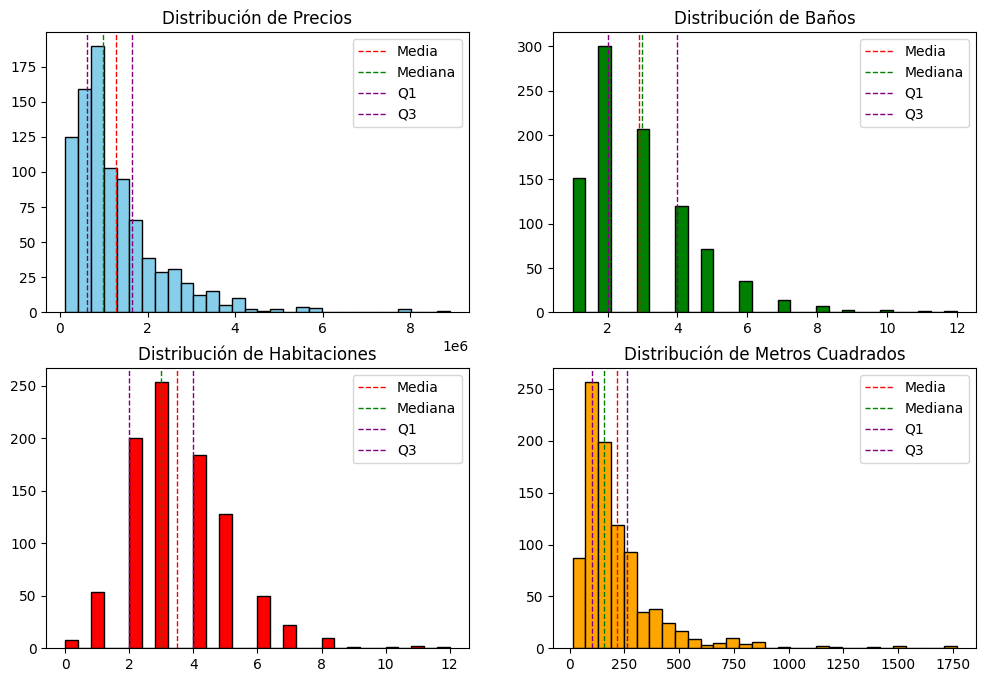

In [25]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(price, bins=30, color='skyblue', edgecolor='black')
plt.axvline(np.mean(price), color='red', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(np.median(price), color='green', linestyle='dashed', linewidth=1, label='Mediana')
plt.axvline(Q1_price, color='purple', linestyle='dashed', linewidth=1, label='Q1')
plt.axvline(Q3_price, color='purple', linestyle='dashed', linewidth=1, label='Q3')
plt.title('Distribución de Precios')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(baths, bins=30, color='green', edgecolor='black')
plt.axvline(np.mean(baths), color='red', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(np.median(baths), color='green', linestyle='dashed', linewidth=1, label='Mediana')
plt.axvline(Q1_baths, color='purple', linestyle='dashed', linewidth=1, label='Q1')
plt.axvline(Q3_baths, color='purple', linestyle='dashed', linewidth=1, label='Q3')
plt.title('Distribución de Baños')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(rooms, bins=30, color='red', edgecolor='black')
plt.axvline(np.mean(rooms), color='red', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(np.median(rooms), color='green', linestyle='dashed', linewidth=1, label='Mediana')
plt.axvline(Q1_rooms, color='purple', linestyle='dashed', linewidth=1, label='Q1')
plt.axvline(Q3_rooms, color='purple', linestyle='dashed', linewidth=1, label='Q3')
plt.title('Distribución de Habitaciones')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(sqft, bins=30, color='orange', edgecolor='black')
plt.axvline(np.mean(sqft), color='red', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(np.median(sqft), color='green', linestyle='dashed', linewidth=1, label='Mediana')
plt.axvline(Q1_sqft, color='purple', linestyle='dashed', linewidth=1, label='Q1')
plt.axvline(Q3_sqft, color='purple', linestyle='dashed', linewidth=1, label='Q3')
plt.title('Distribución de Metros Cuadrados')
plt.legend()

plt.show()


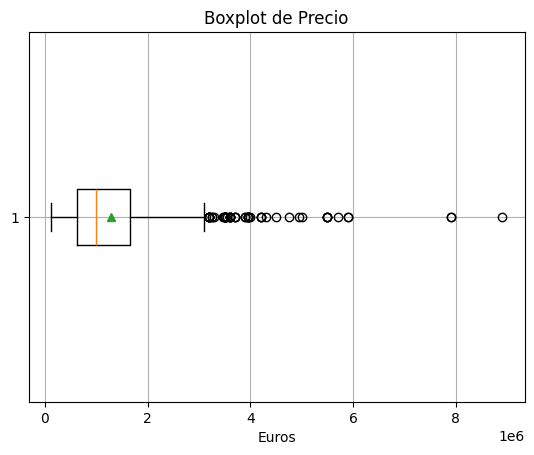

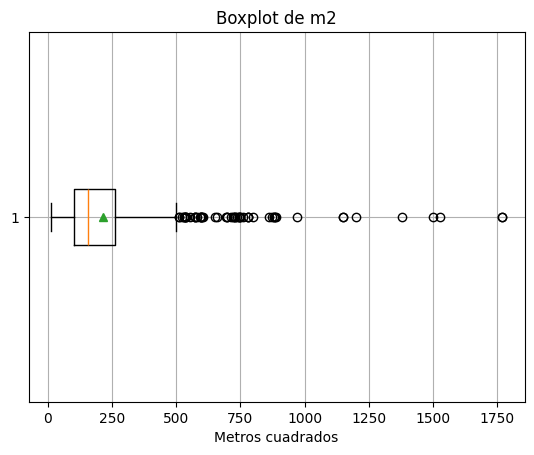

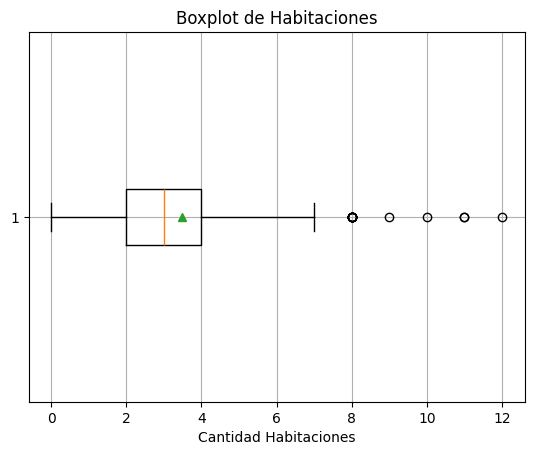

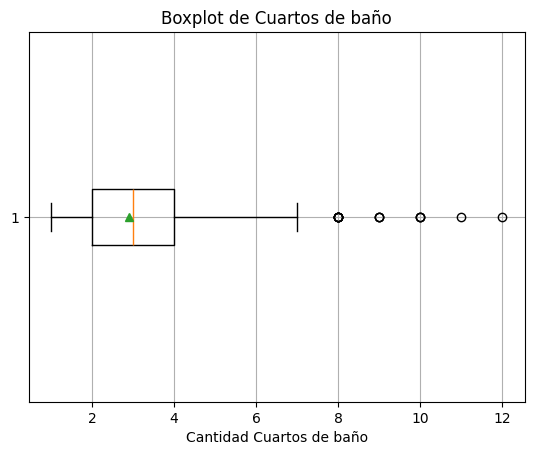

In [26]:

plt.boxplot(price, showmeans=True, orientation="horizontal")
plt.xlabel("Euros")
plt.grid()
plt.title("Boxplot de Precio")
plt.show()

plt.boxplot(sqft, showmeans=True, orientation="horizontal")
plt.xlabel("Metros cuadrados")
plt.grid()
plt.title("Boxplot de m2")
plt.show()

plt.boxplot(rooms, showmeans=True, orientation="horizontal")
plt.xlabel("Cantidad Habitaciones")
plt.grid()
plt.title("Boxplot de Habitaciones")
plt.show()

plt.boxplot(baths, showmeans=True, orientation="horizontal")
plt.xlabel("Cantidad Cuartos de baño")
plt.grid()
plt.title("Boxplot de Cuartos de baño")
plt.show()



# Filtrar 20% más caro y más barato


In [27]:
p20b = np.percentile(price, 20)
p80a = np.percentile(price, 80)

vmb = price[price <= p20b]
vma = price[price >= p80a]

print(f"20% más baratos: {np.mean(vmb)}")
print(f"20% más caros: {np.mean(vma)}")


20% más baratos: 350706.90625
20% más caros: 2915162.0



# Moda


5 direcciones más frecuentes:
Barrio de Salamanca: 63 veces
Hortaleza: 60 veces
Chamartín: 54 veces
Moncloa: 48 veces
Centro: 47 veces


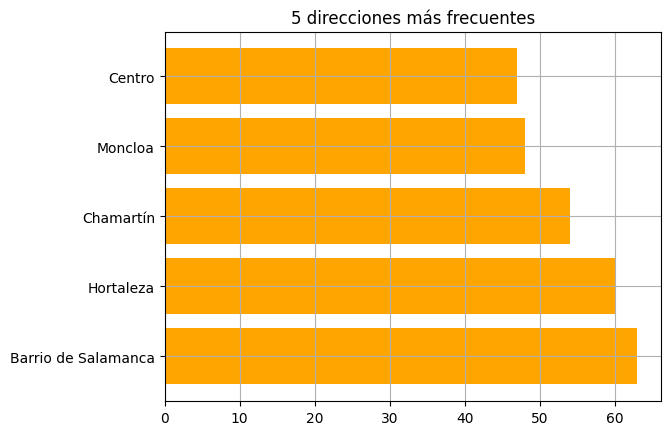

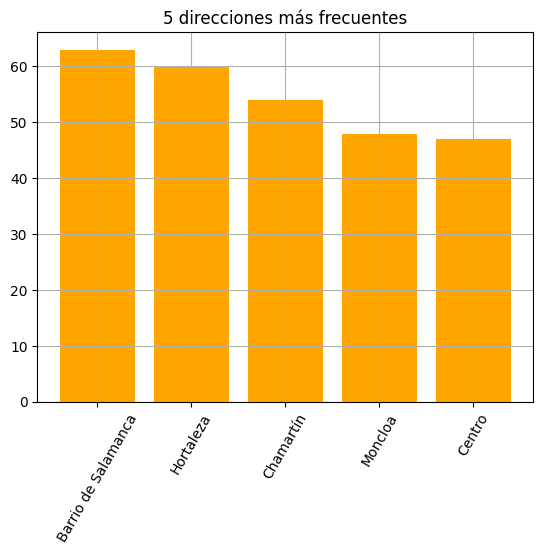

In [28]:
from collections import Counter

contador_address = Counter(address)
address_most_common = contador_address.most_common(5)

print("5 direcciones más frecuentes:")
for address, count in address_most_common:
    print(f"{address}: {count} veces")


plt.barh([item[0] for item in address_most_common], [item[1] for item in address_most_common], color='orange')
plt.grid(True)
plt.title("5 direcciones más frecuentes")
plt.show()

plt.bar([item[0] for item in address_most_common], [item[1] for item in address_most_common], color='orange')
plt.xticks(rotation=60)
plt.grid(True)
plt.title("5 direcciones más frecuentes")
plt.show()




# Dispersión: varianza y desviación estándar


In [29]:
print(f"Varianza de price: {np.var(price)}, Desviación estándar: {np.std(price)}")
print(f"Varianza de baths: {np.var(baths)}, Desviación estándar: {np.std(baths)}")
print(f"Varianza de rooms: {np.var(rooms)}, Desviación estándar: {np.std(rooms)}")
print(f"Varianza de sqft: {np.var(sqft)}, Desviación estándar: {np.std(sqft)}")


Varianza de price: 1073448157184.0, Desviación estándar: 1036073.4375
Varianza de baths: 2.6425680074054165, Desviación estándar: 1.625597738496648
Varianza de rooms: 2.540050762937084, Desviación estándar: 1.5937536707211326
Varianza de sqft: 36726.2798483084, Desviación estándar: 191.64101817802054



# 3. Filtrado de outliers: Tukey


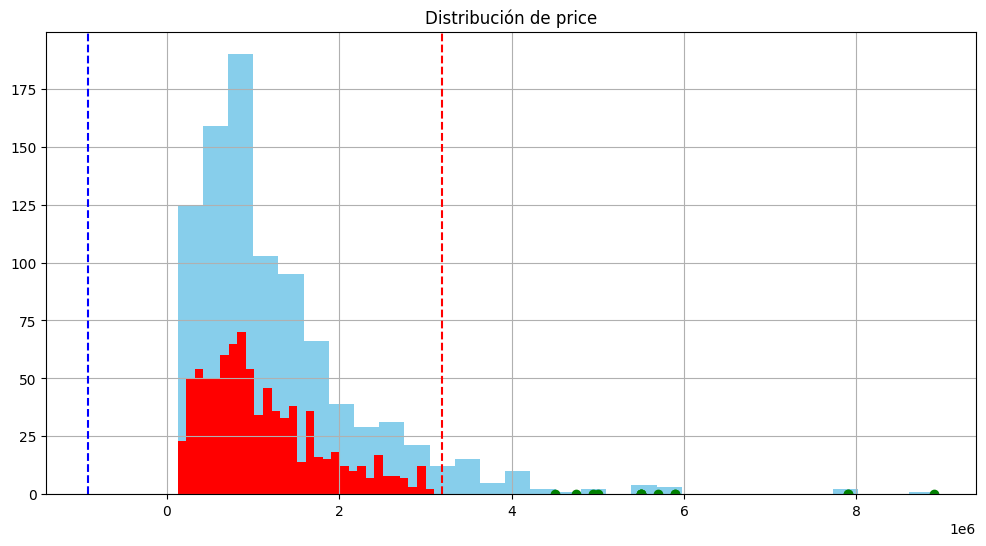

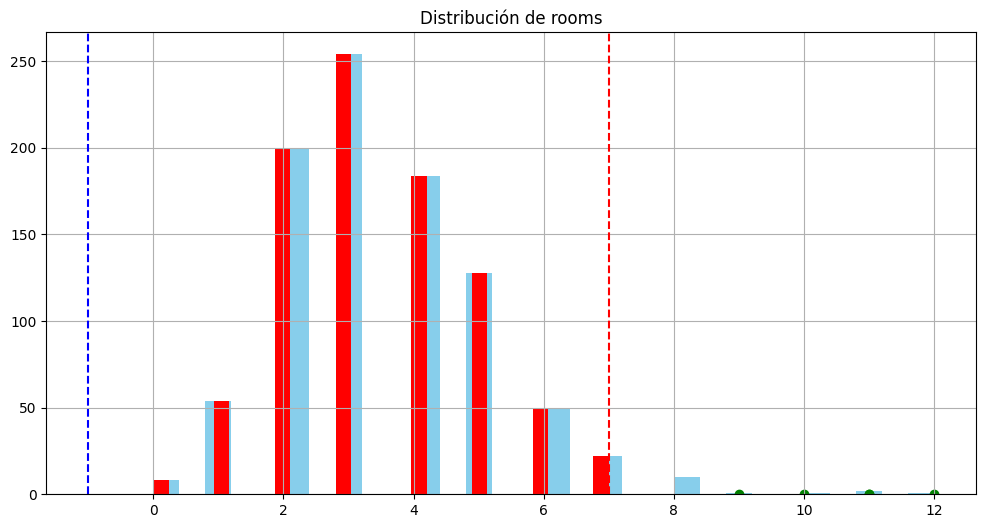

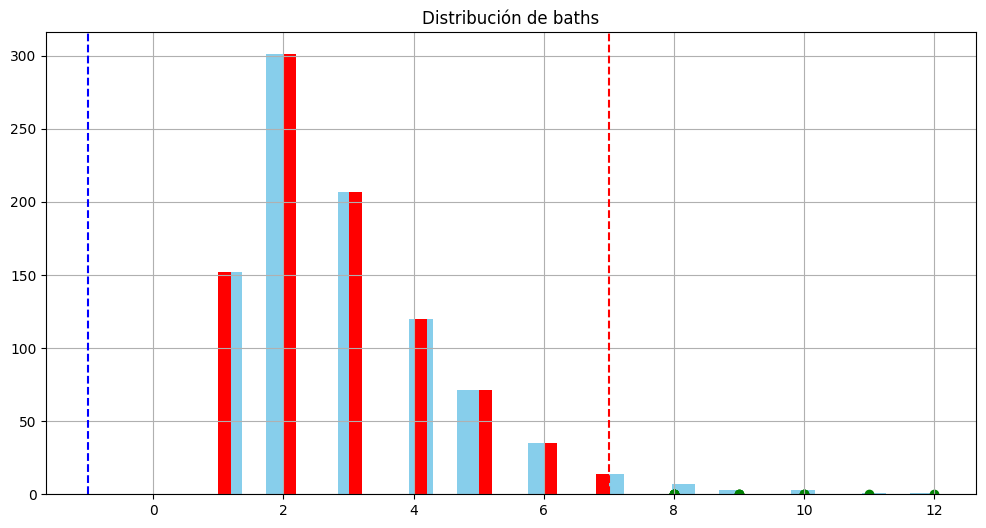

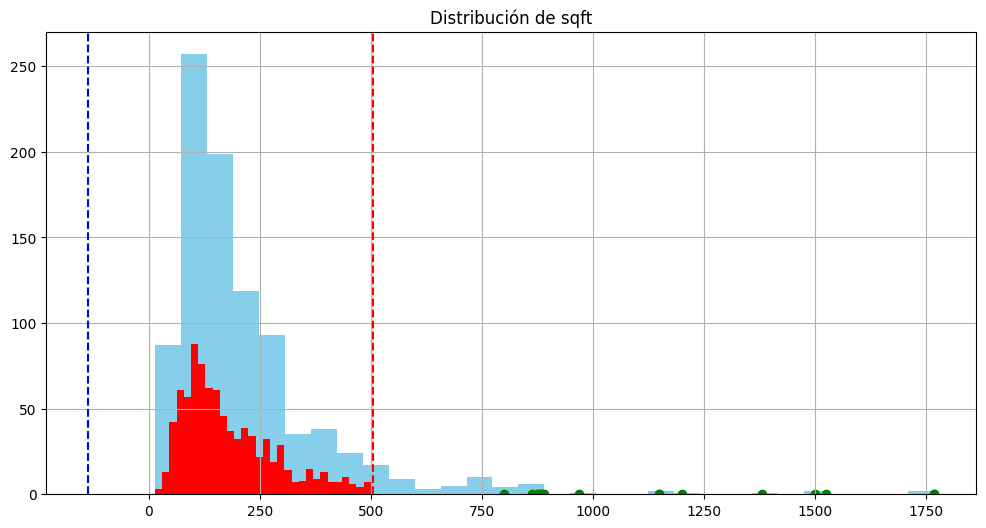

In [30]:
def filtrar_outliers(data, col_name, k=1.5, umbral_z=3):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - k * IQR
    limite_superior = Q3 + k * IQR
    z_scores = stats.zscore(data)
    outliers_zscore = np.abs(z_scores) > umbral_z
    data_sin_outliers = data[(data >= limite_inferior) & (data <= limite_superior)]
    
    plt.figure(figsize=(12, 6))
    plt.hist(data, bins=30, color="skyblue")
    plt.hist(data_sin_outliers, bins=30, color="red")
    plt.axvline(limite_inferior, color='blue', linestyle='--')
    plt.axvline(limite_superior, color='red', linestyle='--')
    outliers_indices = np.where(outliers_zscore)[0]
    plt.scatter(data[outliers_indices], np.zeros_like(outliers_indices), color='green')
    plt.title(f"Distribución de {col_name}")
    plt.grid(True)
    plt.show()

columns = {'price': price, 'rooms': rooms, 'baths': baths, 'sqft': sqft}
for col_name, data in columns.items():
    filtrar_outliers(data, col_name)


# Correlación: calcular la matriz y pintarla con matplotlib/seaborn

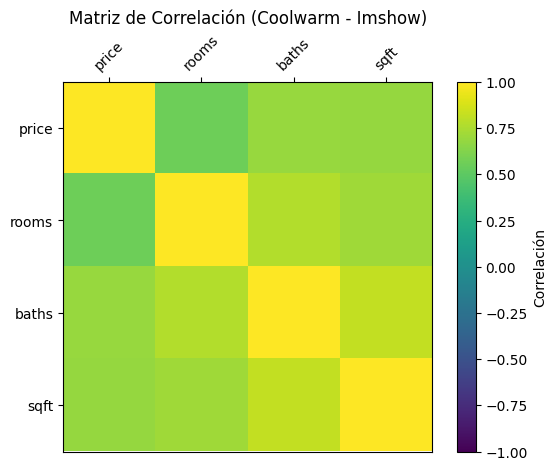

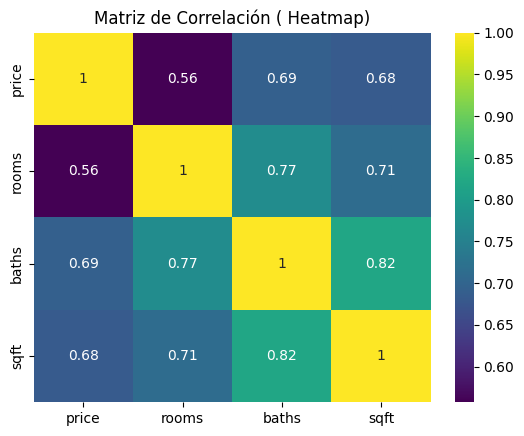

In [31]:
correlation_matrix = []

for col1 in [price, rooms, baths, sqft]:
    row = []
    for col2 in [price, rooms, baths, sqft]:
        row.append(stats.pearsonr(col1, col2)[0])
    correlation_matrix.append(row)

correlation_matrix = np.array(correlation_matrix)

plt.imshow(correlation_matrix, cmap='viridis', vmin=-1, vmax=1)
plt.colorbar(label='Correlación')
column_names = ['price', 'rooms', 'baths', 'sqft']
plt.xticks(range(len(column_names)), column_names, rotation=45)
plt.yticks(range(len(column_names)), column_names)
plt.gca().xaxis.set_ticks_position('top')
plt.title("Matriz de Correlación (Coolwarm - Imshow)")
plt.show()

sns.heatmap(correlation_matrix, annot=True, cmap='viridis', xticklabels=column_names, yticklabels=column_names)
plt.title("Matriz de Correlación ( Heatmap)")
plt.show()



# Estandarización


In [32]:

mean_price = np.mean(price)
median_price = np.median(price)
std_price = np.std(price)

mean_rooms = np.mean(rooms)
median_rooms = np.median(rooms)
std_rooms = np.std(rooms)

mean_baths = np.mean(baths)
median_baths = np.median(baths)
std_baths = np.std(baths)

mean_sqft = np.mean(sqft)
median_sqft = np.median(sqft)
std_sqft = np.std(sqft)

print(f"Media original price: {mean_price}")
print(f"Mediana original price: {median_price}")
print(f"Desviación estándar original price: {std_price}")

print(f"Media original rooms: {mean_rooms}")
print(f"Mediana original rooms: {median_rooms}")
print(f"Desviación estándar original rooms: {std_rooms}")

print(f"Media original baths: {mean_baths}")
print(f"Mediana original baths: {median_baths}")
print(f"Desviación estándar original baths: {std_baths}")

print(f"Media original sqft: {mean_sqft}")
print(f"Mediana original sqft: {median_sqft}")
print(f"Desviación estándar original sqft: {std_sqft}")


price_standard = (price - mean_price) / std_price
rooms_standard = (rooms - mean_rooms) / std_rooms
baths_standard = (baths - mean_baths) / std_baths
sqft_standard = (sqft - mean_sqft) / std_sqft



Media original price: 1290575.125
Mediana original price: 990000.0
Desviación estándar original price: 1036073.4375
Media original rooms: 3.4743169398907106
Mediana original rooms: 3.0
Desviación estándar original rooms: 1.5937536707211326
Media original baths: 2.900546448087432
Mediana original baths: 3.0
Desviación estándar original baths: 1.625597738496648
Media original sqft: 217.2382513661202
Mediana original sqft: 158.0
Desviación estándar original sqft: 191.64101817802054


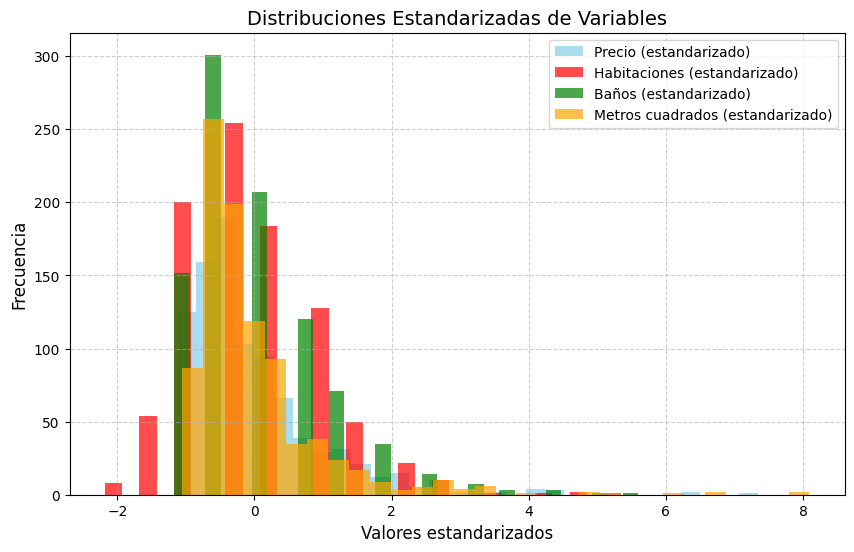

In [33]:

plt.figure(figsize=(10, 6))
plt.hist(price_standard, bins=30, color="skyblue", alpha=0.7, label="Precio (estandarizado)")
plt.hist(rooms_standard, bins=30, color="red", alpha=0.7, label="Habitaciones (estandarizado)")
plt.hist(baths_standard, bins=30, color="green", alpha=0.7, label="Baños (estandarizado)")
plt.hist(sqft_standard, bins=30, color="orange", alpha=0.7, label="Metros cuadrados (estandarizado)")

plt.title("Distribuciones Estandarizadas de Variables", fontsize=14)
plt.xlabel("Valores estandarizados", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.legend(loc="best")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



# 4. Asimetría y curtosis


Coeficiente de asimetría de precio: 2.299673318862915
Coeficiente de asimetría de habitaciones: 0.8842091486712008
Coeficiente de asimetría de baños: 1.4062234804988691
Coeficiente de asimetría de metros cuadrados: 3.3585069451564884
Curtosis de precio: 8.547212600708008
Curtosis de habitaciones: 1.9002632477464063
Curtosis de baños: 3.038919834628686
Curtosis de metros cuadrados: 17.229111152834456


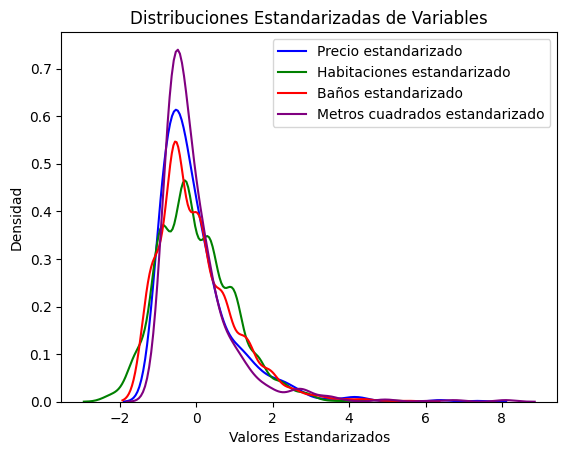

In [34]:
print(f"Coeficiente de asimetría de precio: {stats.skew(price_standard)}")
print(f"Coeficiente de asimetría de habitaciones: {stats.skew(rooms_standard)}")
print(f"Coeficiente de asimetría de baños: {stats.skew(baths_standard)}")
print(f"Coeficiente de asimetría de metros cuadrados: {stats.skew(sqft_standard)}")

print(f"Curtosis de precio: {stats.kurtosis(price_standard)}")
print(f"Curtosis de habitaciones: {stats.kurtosis(rooms_standard)}")
print(f"Curtosis de baños: {stats.kurtosis(baths_standard)}")
print(f"Curtosis de metros cuadrados: {stats.kurtosis(sqft_standard)}")

sns.kdeplot(price_standard, label="Precio estandarizado", color='blue')
sns.kdeplot(rooms_standard, label='Habitaciones estandarizado', color='green')
sns.kdeplot(baths_standard, label='Baños estandarizado', color='red')
sns.kdeplot(sqft_standard, label='Metros cuadrados estandarizado', color='purple')

plt.title("Distribuciones Estandarizadas de Variables")
plt.xlabel("Valores Estandarizados")
plt.ylabel("Densidad")
plt.legend()
plt.show()



# Transformación de distribución


C:\Users\nerea\AppData\Local\Temp\ipykernel_19280\3127970341.py:5: RuntimeWarning: divide by zero encountered in log
  rooms_log = np.log(rooms)


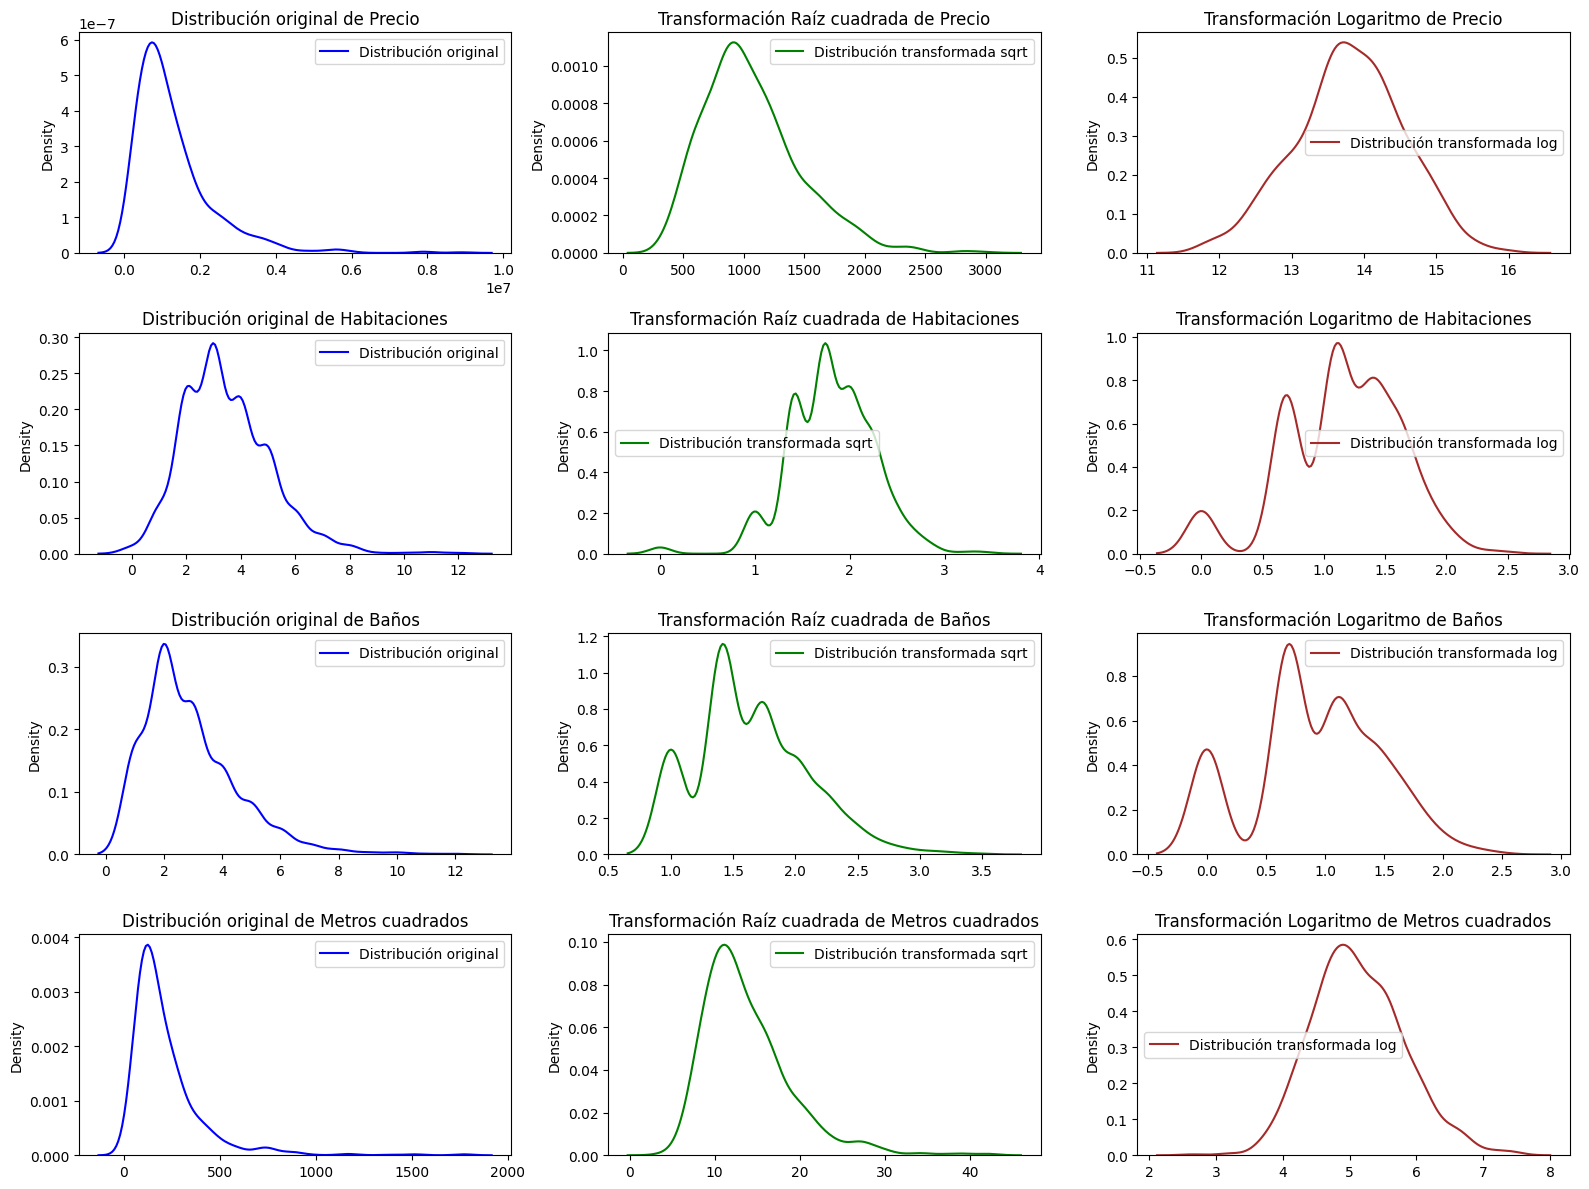

In [35]:
price_sqrt = np.sqrt(price)
price_log = np.log(price)

rooms_sqrt = np.sqrt(rooms)
rooms_log = np.log(rooms)

baths_sqrt = np.sqrt(baths)
baths_log = np.log(baths)

sqft_sqrt = np.sqrt(sqft)
sqft_log = np.log(sqft)

plt.figure(figsize=(16, 12))

plt.subplot(4, 3, 1)
sns.kdeplot(price, label="Distribución original", color="blue")
plt.title("Distribución original de Precio")
plt.legend()

plt.subplot(4, 3, 2)
sns.kdeplot(price_sqrt, label="Distribución transformada sqrt", color="green")
plt.title("Transformación Raíz cuadrada de Precio")
plt.legend()

plt.subplot(4, 3, 3)
sns.kdeplot(price_log, label="Distribución transformada log", color="brown")
plt.title("Transformación Logaritmo de Precio")
plt.legend()

plt.subplot(4, 3, 4)
sns.kdeplot(rooms, label="Distribución original", color="blue")
plt.title("Distribución original de Habitaciones")
plt.legend()

plt.subplot(4, 3, 5)
sns.kdeplot(rooms_sqrt, label="Distribución transformada sqrt", color="green")
plt.title("Transformación Raíz cuadrada de Habitaciones")
plt.legend()

plt.subplot(4, 3, 6)
sns.kdeplot(rooms_log, label="Distribución transformada log", color="brown")
plt.title("Transformación Logaritmo de Habitaciones")
plt.legend()

plt.subplot(4, 3, 7)
sns.kdeplot(baths, label="Distribución original", color="blue")
plt.title("Distribución original de Baños")
plt.legend()

plt.subplot(4, 3, 8)
sns.kdeplot(baths_sqrt, label="Distribución transformada sqrt", color="green")
plt.title("Transformación Raíz cuadrada de Baños")
plt.legend()

plt.subplot(4, 3, 9)
sns.kdeplot(baths_log, label="Distribución transformada log", color="brown")
plt.title("Transformación Logaritmo de Baños")
plt.legend()

plt.subplot(4, 3, 10)
sns.kdeplot(sqft, label="Distribución original", color="blue")
plt.title("Distribución original de Metros cuadrados")
plt.legend()

plt.subplot(4, 3, 11)
sns.kdeplot(sqft_sqrt, label="Distribución transformada sqrt", color="green")
plt.title("Transformación Raíz cuadrada de Metros cuadrados")
plt.legend()

plt.subplot(4, 3, 12)
sns.kdeplot(sqft_log, label="Distribución transformada log", color="brown")
plt.title("Transformación Logaritmo de Metros cuadrados")
plt.legend()

plt.tight_layout()
plt.show()



# Contraste de hipótesis
# Hipótesis 1: Casas en X barrio son más baratas que en Y


In [ ]:
df = pd.read_csv("idealista_madrid.csv", encoding="utf-8")

price = df['price'].values  
address = df['address'].values  

barrio_x = "Centro"
barrio_y = "Chopera"
precios_x = price[address == barrio_x]
precios_y = price[address == barrio_y]


stat1, pvalue1 = stats.ttest_ind(precios_x, precios_y, alternative='greater')

print("\nContraste de hipótesis 1: Precios en", barrio_x, "vs", barrio_y)
print("Estadístico:", stat1, "P-valor:", pvalue1)
if pvalue1 < 0.05:
    print(f"Rechazamos H0: Las casas en {barrio_x} son más caras que en {barrio_y}.")
else:
    print(f"No podemos rechazar H0: No hay evidencia de que las casas en {barrio_x} sean más caras que en {barrio_y}.")



Contraste de hipótesis 1: Precios en Centro vs Chopera
Estadístico: 1.562791512191783 P-valor: 0.062405304170345295
No podemos rechazar H0: No hay evidencia de que las casas en Centro sean más caras que en Chopera.



# Hipótesis 2: Casas con >=3 baños son más caras que casas con 1-2 baños


In [37]:

precios_3_banos = price[baths >= 3]
precios_1_2_banos = price[(baths == 1) | (baths == 2)]

stat2, pvalue2 = stats.ttest_ind(precios_3_banos, precios_1_2_banos, alternative='greater')

print("\nContraste de hipótesis 2: Casas con >= 3 baños vs 1-2 baños")
print("Estadístico:", stat2, "P-valor:", pvalue2)

if pvalue2 < 0.05:
    print("Rechazamos H0: Las casas con >= 3 baños son más caras que las de 1-2 baños.")
else:
    print("No podemos rechazar H0: No hay evidencia de que las casas con >= 3 baños sean más caras que las de 1-2 baños.")



Contraste de hipótesis 2: Casas con >= 3 baños vs 1-2 baños
Estadístico: 21.67225913204634 P-valor: 1.1710649566182796e-84
Rechazamos H0: Las casas con >= 3 baños son más caras que las de 1-2 baños.
